<a href="https://colab.research.google.com/github/Abdullah-NI/NoteBooks/blob/main/25_Building_Linear_Regression_model_from_scratch_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Regression:**

Y = wX + b

Y --> Dependent Variable

X --> Independent Variable

w --> weight

b --> bias

**Gradient Descent:**

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w = w - α*dw

b = b - α*db

**Learning Rate:**

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

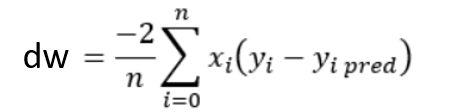

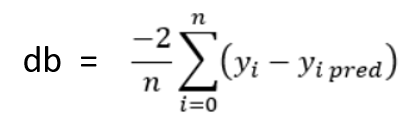

In [1]:
import numpy as np

**Linear Rgression**

In [2]:
class Linear_Regression:
  # initiating the parameter
  def __init__(self,learning_rate,no_of_iteration):
    self.learning_rate=learning_rate
    self.no_of_iteration=no_of_iteration

  def fit(self,x,y):
    # number of training example,and number of feature
    self.m,self.n=x.shape  # no of row and col  m= no of data point, n= no of feature

    # intilize the weight and bias
    self.w=np.zeros(self.n)
    self.b=0
    self.x=x
    self.y=y

    #implementig gradient Descent function
    for i in range(self.no_of_iteration):
      self.update_weights()

  def update_weights(self):
    y_prediction=self.predict(self.x)

    # calculeting gradient
    dw=-(2*(self.x.T).dot(self.y-y_prediction))/self.m
    db=-2*np.sum(self.y-y_prediction)/self.m

    #updating the weight
    self.w=self.w-self.learning_rate*dw
    self.b=self.b-self.learning_rate*db


  def predict(self,x):
    return x.dot(self.w)+self.b   #y=mx+c  ya   y=wx+c




Using linear regression model for prediction

In [3]:
# importing dependeces
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


Data Pre processing

In [4]:
# loading the data from csv file to pandas df
salary_data=pd.read_csv("/content/drive/MyDrive/AllDataset/25 salary_data.csv")

In [5]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [6]:
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [7]:
salary_data.shape

(30, 2)

In [8]:
# checking missing values
salary_data.isnull().sum()

,0
YearsExperience,0
Salary,0


In [9]:
#spliting feature and target
x=salary_data.iloc[:,:-1].values
y=salary_data.iloc[:,1].values

1. **salary_data:**

 This is your Pandas DataFrame containing the salary data loaded from the CSV file.

2. **.iloc[]:** This is the indexer used for selecting data by position (row and column numbers) in a DataFrame.

3. **[:, :-1]:** This part specifies the rows and columns to select.

> **:** before the comma means "select all rows".

> **:-1** after the comma means "select all columns except the last one".

4. **values:** This attribute converts the selected data (a Pandas Series or DataFrame) into a NumPy array.

In [10]:
print(x)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [11]:
print(y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


Splitting the data into training and test

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=2)

In [13]:
print(x.shape,x_train.shape,x_test.shape)

(30, 1) (20, 1) (10, 1)


Training linear regression model


In [14]:
model=Linear_Regression(learning_rate=0.02,no_of_iteration=1000)

In [15]:
model.fit(x_train,y_train)

In [16]:
#printing weight and bias
print('weight',model.w[0])
print('bias',model.b)

weight 9514.400999035135
bias 23697.406507136307


Y=9514(X)+23697

salary=9514(experience year)+23697

Predicting the salary value for test data

In [17]:
test_data_prediction=model.predict(x_test)
print(test_data_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


Visualize  the predicting values andd actual vale

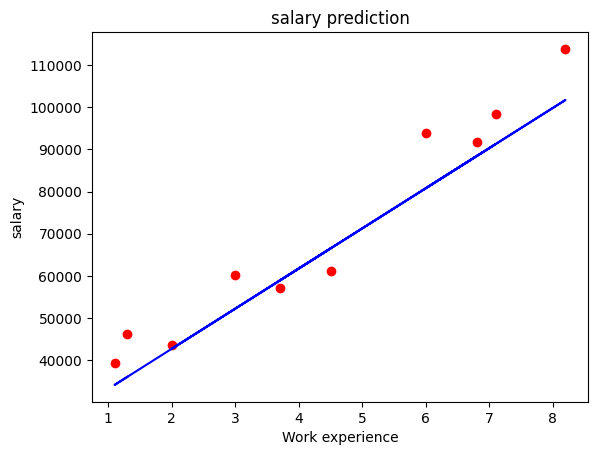

In [22]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,test_data_prediction,color='blue')  # prediction ke liye
plt.title('salary prediction')
plt.xlabel('Work experience')
plt.ylabel('salary')
plt.show()